In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv("C:\\Users\\ERKAN\\Downloads\\data_jobs.csv")
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)


df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA_US = df[(df.job_title_short == "Data Analyst") & (df.job_country =="United States")].copy()
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])


In [2]:
df_DA_US = df_DA_US.explode("job_skills")

In [3]:
df_DA_US[["job_skills", "salary_year_avg"]]

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0
...,...,...
784882,sql,87500.0
784882,vba,87500.0
784882,tableau,87500.0
784882,excel,87500.0


In [4]:
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
df_DA_US_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [5]:
df_DA_top_pay = df_DA_US_group.sort_values("median", ascending=False).head(10)
df_DA_top_pay


,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [6]:
df_DA_top_wanted = df_DA_US_group.sort_values("count", ascending=False).head(10)
df_DA_top_wanted

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


In [7]:
df_DA_top_wanted_pay = df_DA_top_wanted.sort_values("median", ascending=False)
df_DA_top_wanted_pay

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


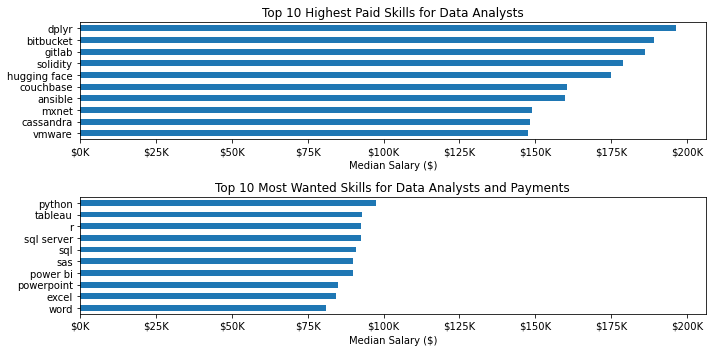

In [24]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind="barh", y="median", ax=ax[0], figsize=(10,5), legend=False)
ax[0].invert_yaxis()


ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("Median Salary ($)")

ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))




df_DA_top_wanted_pay.iloc[::-1].plot(kind="barh", y="median", ax=ax[1], figsize=(10,5), legend=False)
# or ax[1].invert_yaxes()

ax[1].set_title("Top 10 Most Wanted Skills for Data Analysts and Payments")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ($)")
ax[1].set_xlim(ax[0].get_xlim())
# or ax[1].set_xlim(0, 200_000)

ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

fig.tight_layout()

plt.show()
